#**Aim:** Use K-Nearest Neighbors (KNN) model for the Classification

##**Theory**

K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.

K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
KNN is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

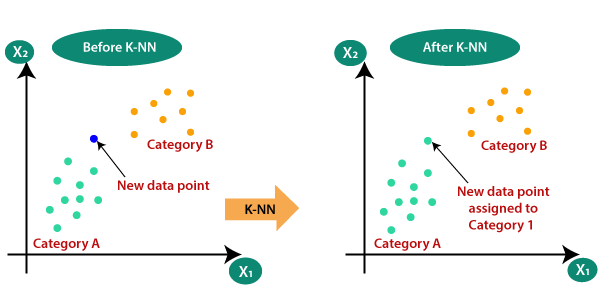

Consider above diagram. Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset.

**Steps in KNN implimentation.**


Step-1: Select the number K of the neighbors

Step-2: Calculate the Euclidean distance of K number of neighbors

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

Step-6: Model is ready.

**Advantages of KNN Algorithm:**

It is simple to implement.

It is robust to the noisy training data

It can be more effective if the training data is large.

**Disadvantages of KNN Algorithm:**

Always needs to determine the value of K which may be complex some time.

The computation cost is high because of calculating the distance between the data points for all the training samples.

##**Import necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import Data**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/AIR_LAB_DATASETS/KNNAlgorithmDataset - KNNAlgorithmDataset.csv')

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##**Check null values count from data**

In [6]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

##**Drop null values coumns and 'id' column**

In [12]:
df.drop(columns=['id'],axis=1,inplace=True)

KeyError: ignored

##**Convert categorical variable columns into numerical data using Label Encoader**

In [13]:
from sklearn.preprocessing import LabelEncoder     
label_encoder = LabelEncoder()
df['diagnosis_Labels']= label_encoder.fit_transform(df['diagnosis']) 
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_Labels
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


##**Drop 'diagnosis' data from the dataframe**

In [14]:
df.drop(columns=['diagnosis'],axis=1,inplace=True)
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_Labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


##**Create inpute features and Target feature from dataset and use Train|Test Split**

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis_Labels',axis=1)
y = df['diagnosis_Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##**Use Standard Scaler for Data scaling**

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

##**import KNN classifier model and fit the data into the model**

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

##**Model Prediction and Evaluation**

In [18]:
y_pred = knn_model.predict(scaled_X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9385964912280702
[[68  3]
 [ 4 39]]


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



##**Elbow Method for Choosing K-Values**

**This uses the test set for the hyperparameter selection of K.**

In [21]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [22]:
test_error_rates

[0.06140350877192979,
 0.052631578947368474,
 0.052631578947368474,
 0.04385964912280704,
 0.052631578947368474,
 0.04385964912280704,
 0.052631578947368474,
 0.04385964912280704,
 0.03508771929824561,
 0.04385964912280704,
 0.04385964912280704,
 0.04385964912280704,
 0.04385964912280704,
 0.04385964912280704,
 0.04385964912280704,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.04385964912280704,
 0.04385964912280704]

Text(0.5, 0, 'K Value')

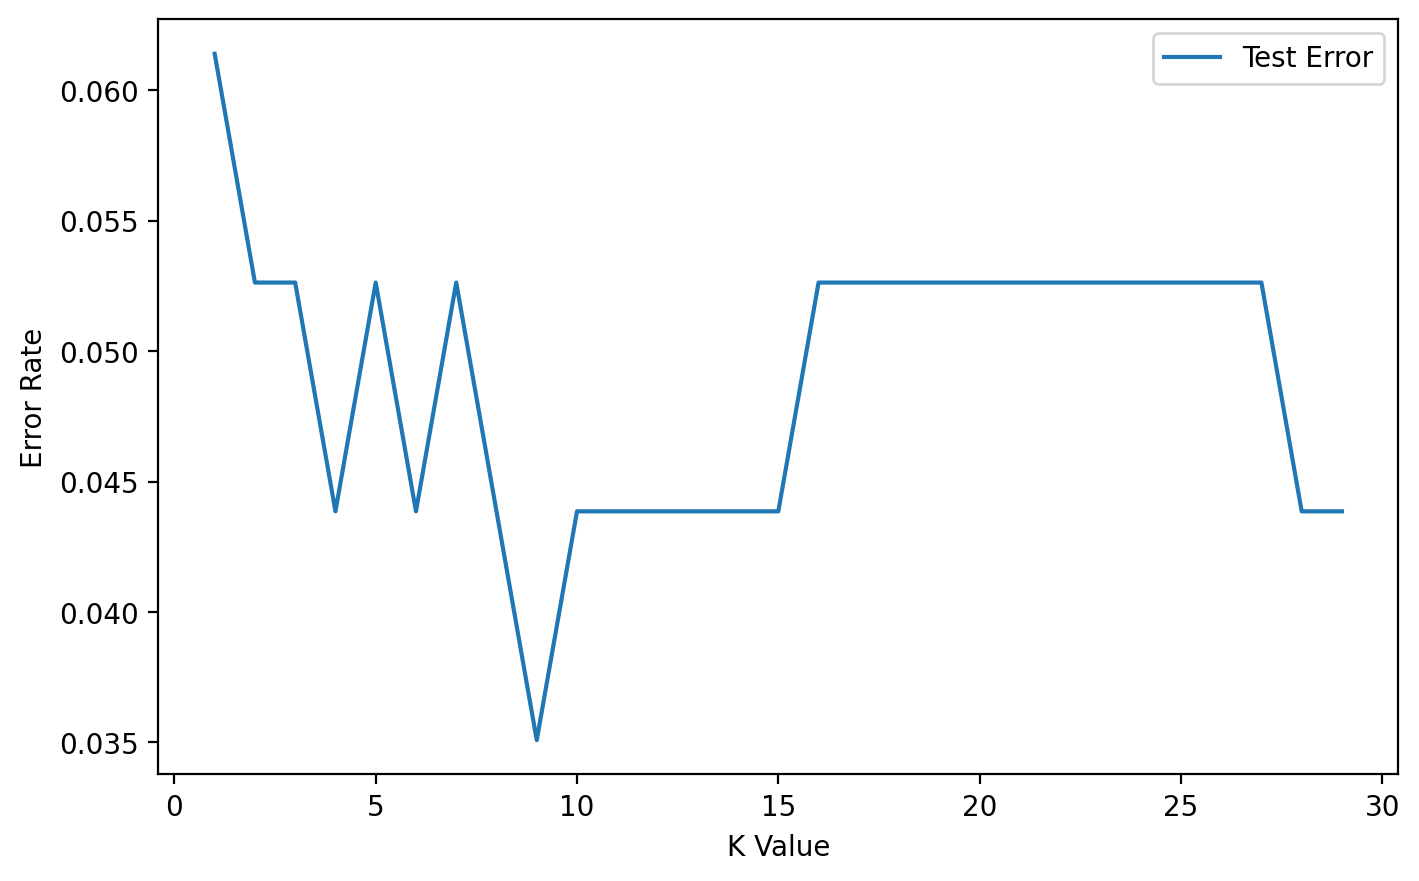

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_model_1 = KNeighborsClassifier(n_neighbors=9)
knn_model_1.fit(scaled_X_train,y_train)
y_pred_1 = knn_model_1.predict(scaled_X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred_1))
print(confusion_matrix(y_test,y_pred_1))

0.9649122807017544
[[69  2]
 [ 2 41]]


In [26]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



##**Full Cross Validation Grid Search for K Value**

## Creating a Pipeline to find K value

We'll use a Pipeline object to set up a workflow of operations:

1. Scale Data
2. Create Model on Scaled Data

In [27]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [28]:
operations = [('scaler',scaler),('knn',knn)]

In [29]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

##**Use GridSearchCV for finding optimized model paprameters**

In [30]:
from sklearn.model_selection import GridSearchCV

---
*Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:**

* chosen_string_name + **two** underscores + parameter key name
* model_name + __ + parameter name
* knn_model + __ + n_neighbors
* knn_model__n_neighbors
---

In [31]:
k_values = list(range(1,20))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [32]:
param_grid = {'knn__n_neighbors': k_values}

In [33]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [34]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [35]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

## Final Model

We just saw that our  GridSearch recommends a K=5 (in line with our alternative Elbow Method). Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.

In [36]:
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=5)
operations = [('scaler',scaler),('knn5',knn)]

In [37]:
pipe = Pipeline(operations)

In [38]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn5', KNeighborsClassifier())])

In [39]:
pipe_pred = pipe.predict(X_test)

In [40]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



##**TASK**
1. Import "KNN_Task_Dataset"
2. Check null values count from data, remove the unnamed columns and null values columns from the data.
3. Create inpute features and Target feature from dataset and use Train|Test Split
4. Use Standard Scaler for Data scaling
5. Import KNN classifier model and fit the data into the model uising K=1
6. Model Prediction and Evaluation
7. Use Elbow Method for Choosing K-Values
8. Re-evaluate the model using new K-value

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.pipeline import Pipeline

1. Import "KNN_Task_Dataset"

In [42]:
dz=pd.read_csv('/content/drive/MyDrive/KNN_Task_Dataset - KNN_Task_Dataset.csv')
dz

,Unnamed: 0,Unnamed: 1,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Diagnosis
0,NaN,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,R
1,0.0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,R
2,1.0,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,R
3,2.0,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,R
4,3.0,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,202.0,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,M
204,203.0,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,M
205,204.0,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,M
206,205.0,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,M


In [43]:
dz.head()

,Unnamed: 0,Unnamed: 1,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Diagnosis
0,NaN,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,R
1,0.0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,R
2,1.0,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,R
3,2.0,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,R
4,3.0,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,R


In [44]:
dz.shape

(208, 17)

In [45]:
dz.size

3536

2. Check null values count from data, remove the unnamed columns and null values columns from the data.

In [46]:
dz.isna().sum()

Unnamed: 0    1
Unnamed: 1    0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Diagnosis     0
dtype: int64

In [47]:
dz.isnull().sum()

Unnamed: 0    1
Unnamed: 1    0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Diagnosis     0
dtype: int64

In [48]:
dz.columns.tolist()

['Unnamed: 0',
 'Unnamed: 1',
 'Feature_1',
 'Feature_2',
 'Feature_3',
 'Feature_4',
 'Feature_5',
 'Feature_6',
 'Feature_7',
 'Feature_8',
 'Feature_9',
 'Feature_10',
 'Feature_11',
 'Feature_12',
 'Feature_13',
 'Feature_14',
 'Diagnosis']

In [49]:
dz = dz.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1)

In [50]:
dz.columns.tolist()

['Feature_1',
 'Feature_2',
 'Feature_3',
 'Feature_4',
 'Feature_5',
 'Feature_6',
 'Feature_7',
 'Feature_8',
 'Feature_9',
 'Feature_10',
 'Feature_11',
 'Feature_12',
 'Feature_13',
 'Feature_14',
 'Diagnosis']

In [51]:
dz['Diagnosis'].unique()

array(['R', 'M'], dtype=object)

In [52]:
dz['Diagnosis'].nunique()

2

In [53]:
dz.dtypes

Feature_1     float64
Feature_2     float64
Feature_3     float64
Feature_4     float64
Feature_5     float64
Feature_6     float64
Feature_7     float64
Feature_8     float64
Feature_9     float64
Feature_10    float64
Feature_11    float64
Feature_12    float64
Feature_13    float64
Feature_14    float64
Diagnosis      object
dtype: object

In [54]:
label_encoder = LabelEncoder()
dz['Diagnosis'] = label_encoder.fit_transform(dz['Diagnosis'])
dz

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Diagnosis
0,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,1
1,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,1
2,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,1
3,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,1
4,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0
204,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0
205,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0
206,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0


3. Create inpute features and Target feature from dataset and use Train|Test Split

In [55]:
X = dz.iloc[:, 0:13]
y = dz['Diagnosis']

In [56]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Use Standard Scaler for Data scaling

In [57]:
scaler = StandardScaler()

In [58]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

5. Import KNN classifier model and fit the data into the model uising K=1

In [59]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

6. Model Prediction and Evaluation

In [60]:
y_pred = knn.predict(scaled_X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
cf = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print()
print("Confusion Matrix:", cm)
print()
print("Recall", recall)
print('Precision', precision)
print()
print('Classification Report', cf)

Accuracy: 0.8095238095238095

Confusion Matrix: [[21  5]
 [ 3 13]]

Recall 0.8125
Precision 0.7222222222222222

Classification Report               precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.72      0.81      0.76        16

    accuracy                           0.81        42
   macro avg       0.80      0.81      0.80        42
weighted avg       0.82      0.81      0.81        42



7. Use Elbow Method for Choosing K-Values

In [62]:
test_error_rates = []

In [63]:
k_values = [i for i in range (1,21)]

In [64]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    
    y_pred_test = knn.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)

In [65]:
print(test_error_rates)

[0.19047619047619047, 0.11904761904761907, 0.2142857142857143, 0.1428571428571429, 0.16666666666666663, 0.16666666666666663, 0.19047619047619047, 0.1428571428571429, 0.1428571428571429, 0.1428571428571429, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663]


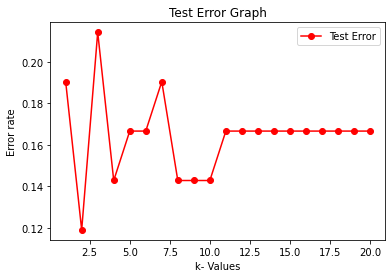

In [66]:
plt.plot(k_values, test_error_rates, label= 'Test Error', marker = 'o', c = 'r')
plt.legend()
plt.title('Test Error Graph')
plt.xlabel("k- Values")
plt.ylabel("Error rate")
plt.show()

8. Re-evaluate the model using new K-value

Our test error graph shows that lowest error rate is at 2.45 value of K. Therefore, New values for K is 2 as it takes an integer input.

In [67]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [68]:
y_pred = knn.predict(scaled_X_test)

In [69]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
cf = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print()
print("Confusion Matrix:", cm)
print()
print("Recall", recall)
print('Precision', precision)
print()
print('Classification Report', cf)

Accuracy: 0.8809523809523809

Confusion Matrix: [[25  1]
 [ 4 12]]

Recall 0.75
Precision 0.9230769230769231

Classification Report               precision    recall  f1-score   support

           0       0.86      0.96      0.91        26
           1       0.92      0.75      0.83        16

    accuracy                           0.88        42
   macro avg       0.89      0.86      0.87        42
weighted avg       0.89      0.88      0.88        42

